In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import cartopy.feature as cfeature

from metpy.calc import reduce_point_density
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots import add_metpy_logo, current_weather, sky_cover, StationPlot

# Read the files and import all rows.import pandas as pd


data= pd.read_csv('446901882_22021_4747_airline_delay_causes.csv')
data.head(20)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0,NaN
5,2019,1,MQ,Envoy Air,SPI,"Springfield, IL: Abraham Lincoln Capital",53.0,5.0,2.91,0.00,...,1.00,2.0,0.0,169.0,100.0,0.0,28.0,0.0,41.0,NaN
6,2019,1,MQ,Envoy Air,SPS,"Wichita Falls, TX: Sheppard AFB/Wichita Falls ...",88.0,8.0,2.36,0.22,...,2.97,6.0,0.0,263.0,98.0,5.0,66.0,0.0,94.0,NaN
7,2019,1,MQ,Envoy Air,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",31.0,13.0,1.25,0.55,...,1.30,2.0,0.0,537.0,41.0,60.0,391.0,0.0,45.0,NaN
8,2019,1,MQ,Envoy Air,STL,"St. Louis, MO: St Louis Lambert International",59.0,15.0,3.61,2.07,...,4.28,7.0,0.0,683.0,205.0,78.0,218.0,0.0,182.0,NaN
9,2019,1,MQ,Envoy Air,SUX,"Sioux City, IA: Sioux Gateway Brig Gen Bud Day...",116.0,16.0,0.00,1.69,...,5.51,16.0,0.0,658.0,0.0,88.0,238.0,0.0,332.0,NaN


In [482]:
# Print out the number of rows imported from the files.
data.shape

(87860, 22)

In [483]:
### Identify the airports in the state of Texas.

data['TX'] = data['airport_name'].apply(lambda x: x.find('TX'))

# Create a set of airport names (to eliminate the duplicates).
airports = set(data[data['TX'] != -1]['airport_name'])
airports = set(data[data['TX'] != -1]['airport'])
# Display the list of airports.
print("There are" + str(len(airports)) +" airport in Texas, there name is" + str(airports) )



There are27 airport in Texas, there name is{'GRK', 'AMA', 'ABI', 'LBB', 'ELP', 'SJT', 'BRO', 'GGG', 'HOU', 'SPS', 'MFE', 'AUS', 'CRP', 'IAH', 'DAL', 'DRT', 'BPT', 'VCT', 'DFW', 'SAT', 'EFD', 'LRD', 'HRL', 'CLL', 'ACT', 'TYR', 'MAF'}


In [484]:
## read the coordinate file and position to airplot
df_coords = pd.read_csv('airport_coordinates.csv')
df_coords.head(10)

,airport,lat,long
0,01A,58.109444,-152.906667
1,03A,65.548056,-161.071667
2,04A,68.083333,-163.166667
3,05A,67.570000,-148.183889
4,06A,57.745278,-152.882778
5,07A,55.554722,-133.101667
6,08A,59.156944,-151.829167
7,09A,59.362778,-153.430556
8,1B1,42.288889,-73.710278
9,1G4,35.990278,-113.816389


In [485]:
# Create a new DataFrame with airport codes and names.
df_airports = data[['airport', 'airport_name']].drop_duplicates().reset_index(drop=True)

# Merge the coordinates DataFrame with the airports DataFrame.
df_airports = pd.merge(df_airports, df_coords, on='airport')
df_airports 

,airport,airport_name,lat,long
0,SAV,"Savannah, GA: Savannah/Hilton Head International",32.127500,-81.202500
1,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",38.179722,-85.738611
2,SGF,"Springfield, MO: Springfield-Branson National",37.240000,-93.385000
3,SHV,"Shreveport, LA: Shreveport Regional",32.446944,-93.825556
4,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",31.359722,-100.494444
...,...,...,...,...
375,ENV,"Wendover, UT: Wendover Airport",40.718611,-114.033889
376,TKI,"Tokeen, AK: Tokeen Airport",55.937500,-133.325000
377,YNG,"Youngstown/Warren, OH: Youngstown-Warren Regional",41.256111,-80.669722
378,FLO,"Florence, SC: Florence Regional",34.188889,-79.724444


In [486]:
# set up the map projection
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[40])

# Use the Cartopy map projection to transform station locations to the map and
# then refine the number of stations plotted by setting a 300km radius
point_locs = proj.transform_points(ccrs.PlateCarree(), df_airports['long'].values,
                                   df_airports['lat'].values)
point_locs


array([[1308610.96674002, -219102.7263444 ,       0.        ],
       [ 810405.85535592,  395649.53908075,       0.        ],
       [ 143456.48405118,  250426.17832724,       0.        ],
       ...,
       [1196122.70434435,  791481.26916847,       0.        ],
       [1408228.15498616,   30592.18004015,       0.        ],
       [ -15606.88478327, -603433.29377059,       0.        ]])

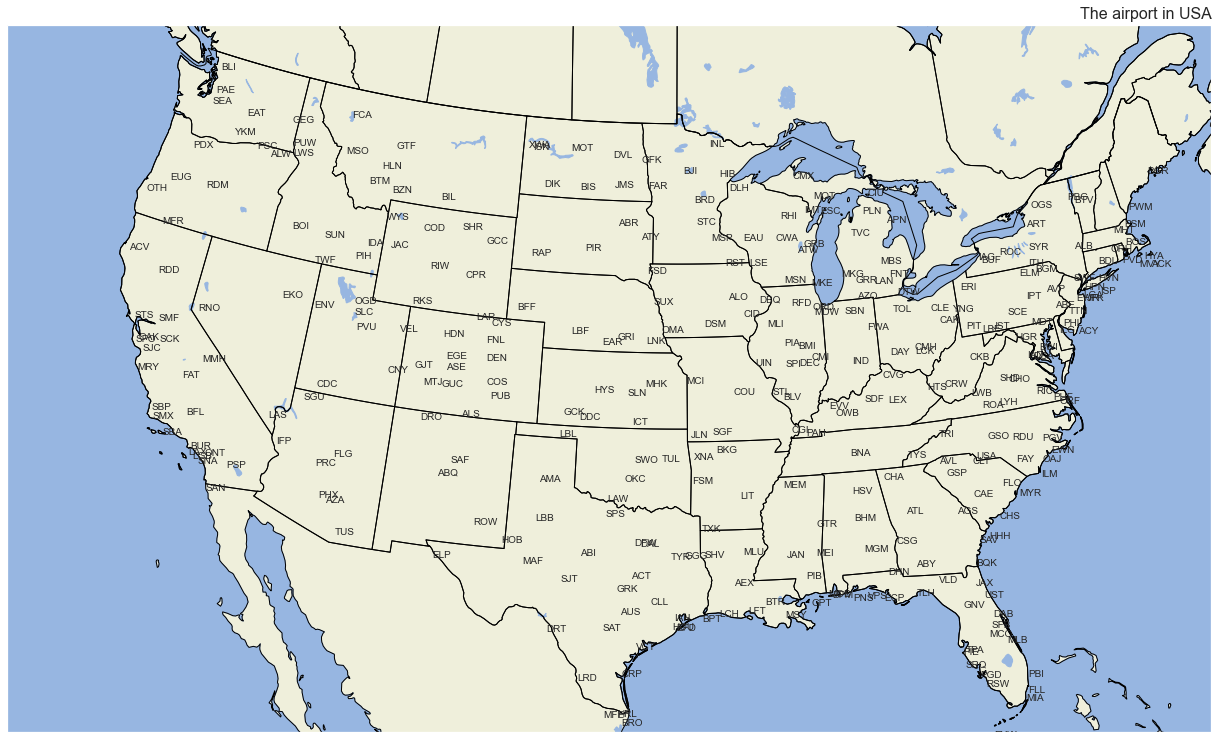

In [487]:
## Plot the airplots in station
# look of the text rendering.
plt.rcParams['savefig.dpi'] = 260

# Create the figure and an axes set to the projection.
fig = plt.figure(figsize=(24, 13))

ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add some various map elements to the plot to make it recognizable.
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Set plot bounds
ax.set_extent((-123, -73, 23, 50))

#
# Here's the actual station plot
from matplotlib.transforms import Bbox


# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax,df_airports ['long'].values, df_airports ['lat'].values,
                          clip_on=True,transform=ccrs.PlateCarree(), fontsize=10,)
stationplot.plot_text((1, -1),df_airports['airport'])
plt.title('The airport in USA', fontsize=16, loc='right')

plt.show()

In [488]:
## Find the number of delay base on airport
delay_5year=data.groupby('airport')['arr_del15'].sum().reset_index(name='num_delays')
delay_5year

,airport,num_delays
0,ABE,2859.0
1,ABI,1015.0
2,ABQ,17755.0
3,ABR,365.0
4,ABY,714.0
...,...,...
378,XWA,114.0
379,YAK,447.0
380,YKM,12.0
381,YNG,2.0


In [489]:
delay5_years = delay_5year[['airport', 'num_delays']].drop_duplicates().reset_index(drop=True)

# Merge the coordinates DataFrame with the airports DataFrame.
delay5 = pd.merge(delay5_years, df_coords, on='airport')

In [490]:
delay5

,airport,num_delays,lat,long
0,ABE,2859.0,40.654722,-75.438333
1,ABI,1015.0,32.409444,-99.679722
2,ABQ,17755.0,35.041667,-106.606389
3,ABR,365.0,45.449722,-98.421667
4,ABY,714.0,31.532222,-84.196111
...,...,...,...,...
375,XNA,8104.0,36.281944,-94.306944
376,XWA,114.0,48.260833,-103.751111
377,YAK,447.0,59.509167,-139.659722
378,YKM,12.0,46.566944,-120.537778


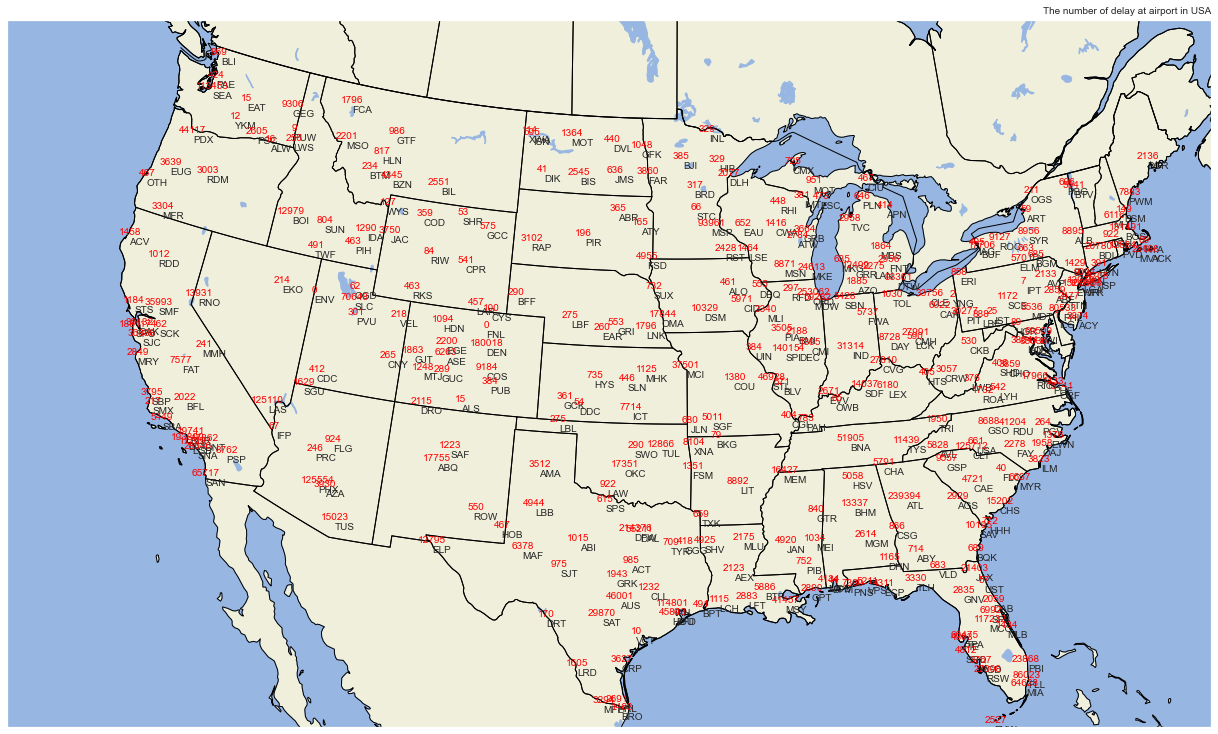

In [491]:
## plot airplot and number of delay in past 5 years
# set up the map projection
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[40])

# Use the Cartopy map projection to transform station locations to the map and
# then refine the number of stations plotted by setting a 300km radius
point_locs = proj.transform_points(ccrs.PlateCarree(), delay5['long'].values,
                                   delay5['lat'].values)
## Plot the airplots in station
# look of the text rendering.
plt.rcParams['savefig.dpi'] = 260

# Create the figure and an axes set to the projection.
fig = plt.figure(figsize=(24, 13))

ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add some various map elements to the plot to make it recognizable.
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Set plot bounds
ax.set_extent((-123, -73, 23, 50))

#
# Here's the actual station plot
from matplotlib.transforms import Bbox


# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax,delay5['long'].values, delay5 ['lat'].values,
                          clip_on=True,transform=ccrs.PlateCarree(), fontsize=10,)
stationplot.plot_text((1, -1),delay5['airport'])
#plot number of delay
stationplot.plot_parameter('C', delay5['num_delays'].values, color='red')
plt.title('The number of delay at airport in USA', fontsize=10, loc='right')

plt.show()


In [492]:
## Display how many delay in Texas in past 5yeas base on airport
### Identify the airports in the state of Texas.

data['TX'] = data['airport_name'].apply(lambda x: x.find('TX'))

# Create a set of airport names (to eliminate the duplicates).
airports = set(data[data['TX'] != -1]['airport_name'])
airport = set(data[data['TX'] != -1]['airport'])
# Display the list of airports.
print("There are" + str(len(airports)) +" airport in Texas, there name is" + str(airports) )
airport

There are27 airport in Texas, there name is{'Corpus Christi, TX: Corpus Christi International', 'Beaumont/Port Arthur, TX: Jack Brooks Regional', 'Austin, TX: Austin - Bergstrom International', 'Harlingen/San Benito, TX: Valley International', 'Abilene, TX: Abilene Regional', 'Killeen, TX: Robert Gray AAF', 'Lubbock, TX: Lubbock Preston Smith International', 'San Angelo, TX: San Angelo Regional/Mathis Field', 'Houston, TX: Ellington', 'Laredo, TX: Laredo International', 'Midland/Odessa, TX: Midland International Air and Space Port', 'Del Rio, TX: Del Rio International', 'Amarillo, TX: Rick Husband Amarillo International', 'Mission/McAllen/Edinburg, TX: McAllen Miller International', 'Houston, TX: William P Hobby', 'Tyler, TX: Tyler Pounds Regional', 'Wichita Falls, TX: Sheppard AFB/Wichita Falls Municipal', 'El Paso, TX: El Paso International', 'Dallas, TX: Dallas Love Field', 'San Antonio, TX: San Antonio International', 'Brownsville, TX: Brownsville South Padre Island International',

{'ABI',
 'ACT',
 'AMA',
 'AUS',
 'BPT',
 'BRO',
 'CLL',
 'CRP',
 'DAL',
 'DFW',
 'DRT',
 'EFD',
 'ELP',
 'GGG',
 'GRK',
 'HOU',
 'HRL',
 'IAH',
 'LBB',
 'LRD',
 'MAF',
 'MFE',
 'SAT',
 'SJT',
 'SPS',
 'TYR',
 'VCT'}

In [493]:
## restore delay in past 5 years
delay5.to_csv('delay5.csv')

In [494]:
## Parpare data in texas
delay_T=delay_texas.loc[["ABI","ACT","AMA","AUS","BPT","BRO","CLL","CRP","DAL","DFW","DRT","EFD","ELP","GGG","GRK","HOU","HRL","IAH","LBB","LRD",
                         "MAF","MFE","SAT","SJT","SPS","TYR","VCT"]]
delay_T

,Unnamed: 0,num_delays,lat,long
airport,,,,
ABI,1,1015.0,32.409444,-99.679722
ACT,6,985.0,31.611389,-97.228611
AMA,18,3512.0,35.227222,-101.721944
AUS,26,46001.0,30.194444,-97.670000
BPT,49,491.0,29.950833,-94.020000
BRO,53,1463.0,25.906389,-97.425556
CLL,75,1232.0,30.589444,-96.364444
CRP,85,3627.0,27.770000,-97.500833
DAL,92,55211.0,32.846944,-96.853333


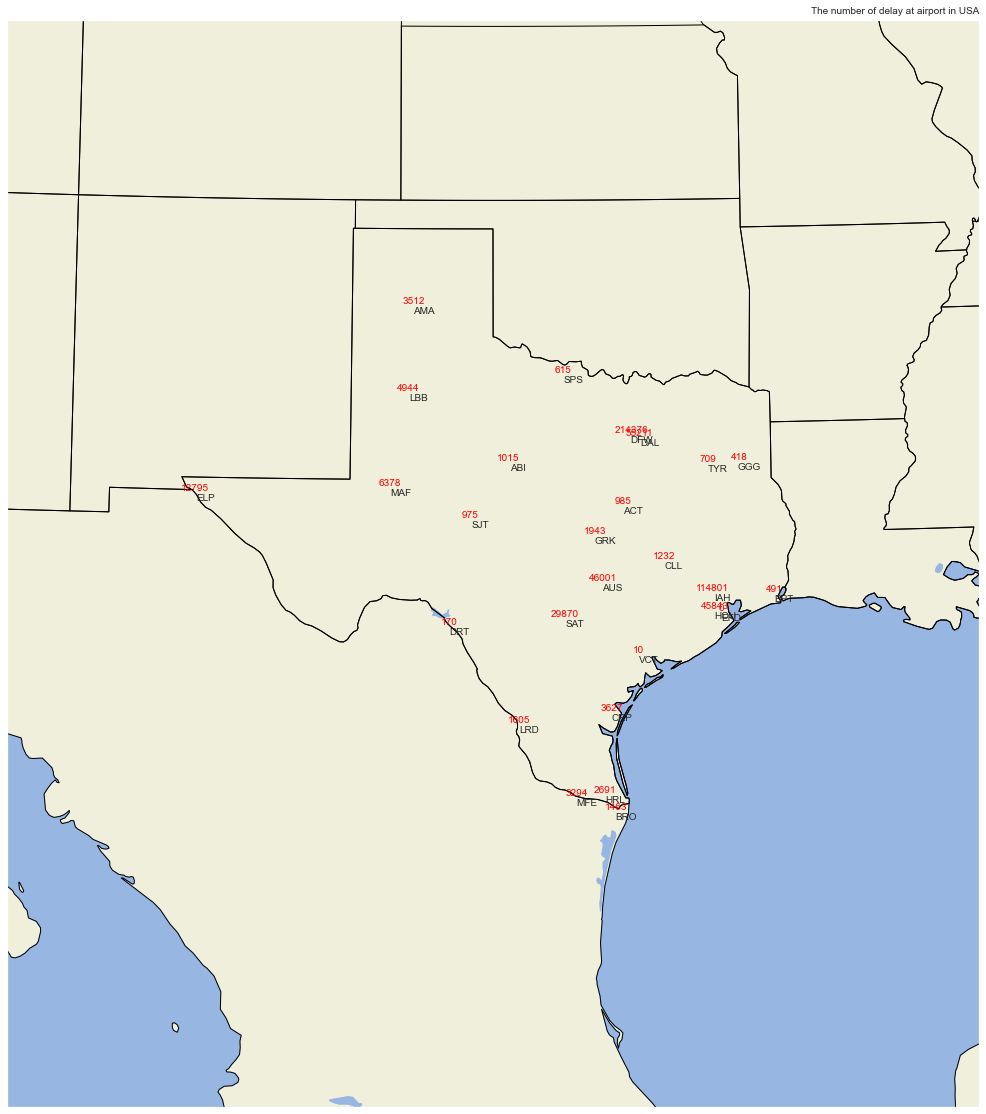

In [500]:
## plot airplot and number of delay in past 5 years
# set up the map projection
proj = ccrs.LambertConformal(central_longitude=-100, central_latitude=32,
                             standard_parallels=[10])

# Use the Cartopy map projection to transform station locations to the map and
# then refine the number of stations plotted by setting a 300km radius
point_locs = proj.transform_points(ccrs.PlateCarree(), delay5['long'].values,
                                   delay5['lat'].values)
## Plot the airplots in station
# look of the text rendering.
plt.rcParams['savefig.dpi'] = 260

# Create the figure and an axes set to the projection.
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add some various map elements to the plot to make it recognizable.
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Set plot bounds
ax.set_extent((-110, -90,20 , 40))

#
# Here's the actual station plot
from matplotlib.transforms import Bbox


# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax,delay5['long'].values, delay5 ['lat'].values,
                          clip_on=True,transform=ccrs.PlateCarree(), fontsize=10,)
stationplot.plot_text((1, -1),delay5['airport'])
#plot number of delay
stationplot.plot_parameter('C', delay5['num_delays'].values, color='red')
plt.title('The number of delay at airport in USA', fontsize=10, loc='right')

plt.show()


Text(0.5, 1.0, 'number of delay in Texas Airplot in past 5 years')

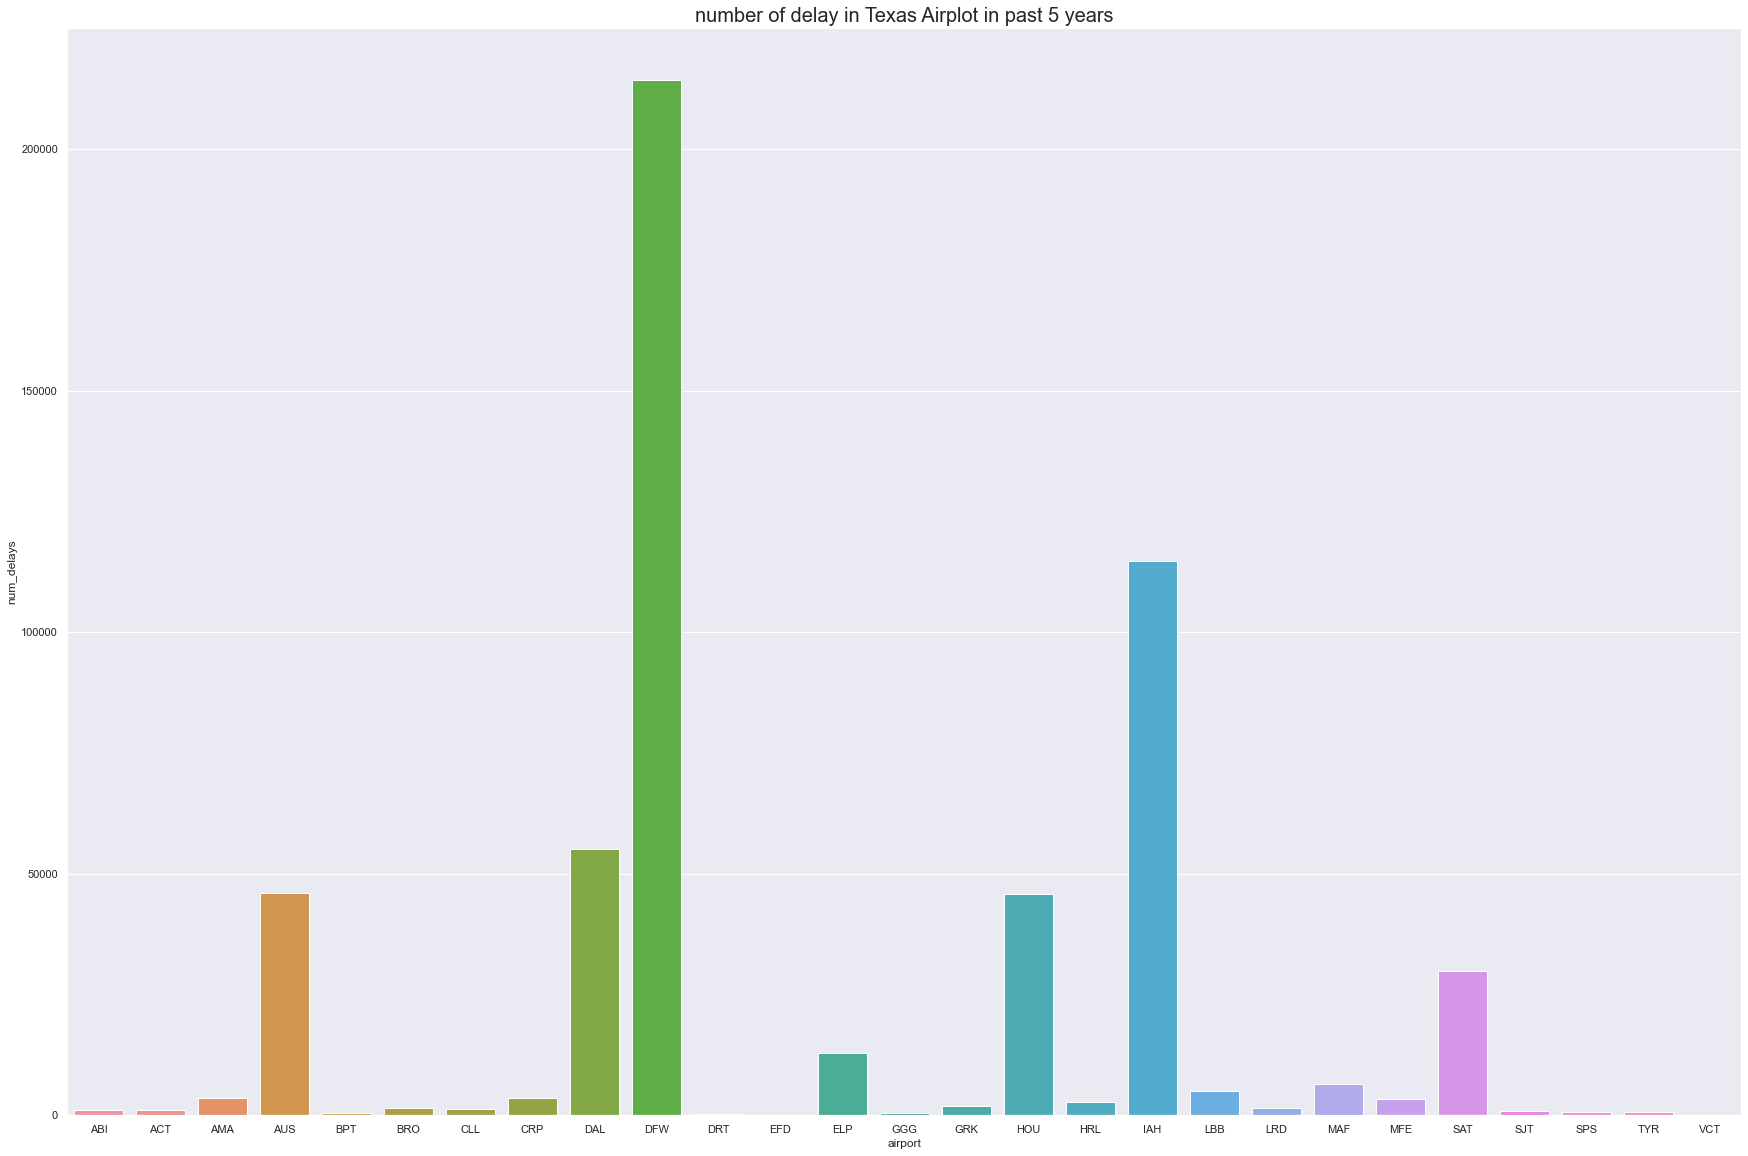

In [525]:

delay5= pd.read_csv('Dealy_T5.csv')
delay5
import seaborn as sns
fig_dims=(30,20)
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x="airport",y="num_delays",ax=ax,data=delay5)
plt.title("number of delay in Texas Airplot in past 5 years",fontsize=20)


In [501]:
## number of iverted flights for each carrier-airport pair.
carrier=pd.crosstab(data['carrier'], data['airport'], values=data['arr_del15'], aggfunc='sum').fillna('')
carrier

airport,ABE,ABI,ABQ,ABR,ABY,ACK,ACT,ACV,ACY,ADK,...,VLD,VPS,WRG,WYS,XNA,XWA,YAK,YKM,YNG,YUM
carrier,,,,,,,,,,,,,,,,,,,,,
9E,175,,,,105,32,,,,,...,121,50,,,661,,,,,
AA,,,2341,,,,,,,,...,,643,,,290,,,,,
AS,,,283,,,,,,,104,...,,,600,,,,447,,,
B6,,,330,,,608,,,,,...,,,,,,,,,,
DL,163,,679,,,,,,,,...,,1019,,,276,,,,,
EV,618,44,197,,294,,328,,,,...,302,960,,,1487,,,,,
F9,,,214,,,,,,,,...,,,,,16,,,,,
G4,485,,93,,,,,,,,...,,1075,,,223,,,,2,
HA,,,,,,,,,,,...,,,,,,,,,,


Text(0.5, 1.0, 'number of dealy in past 5 years base on carrier company at SAT Airport')

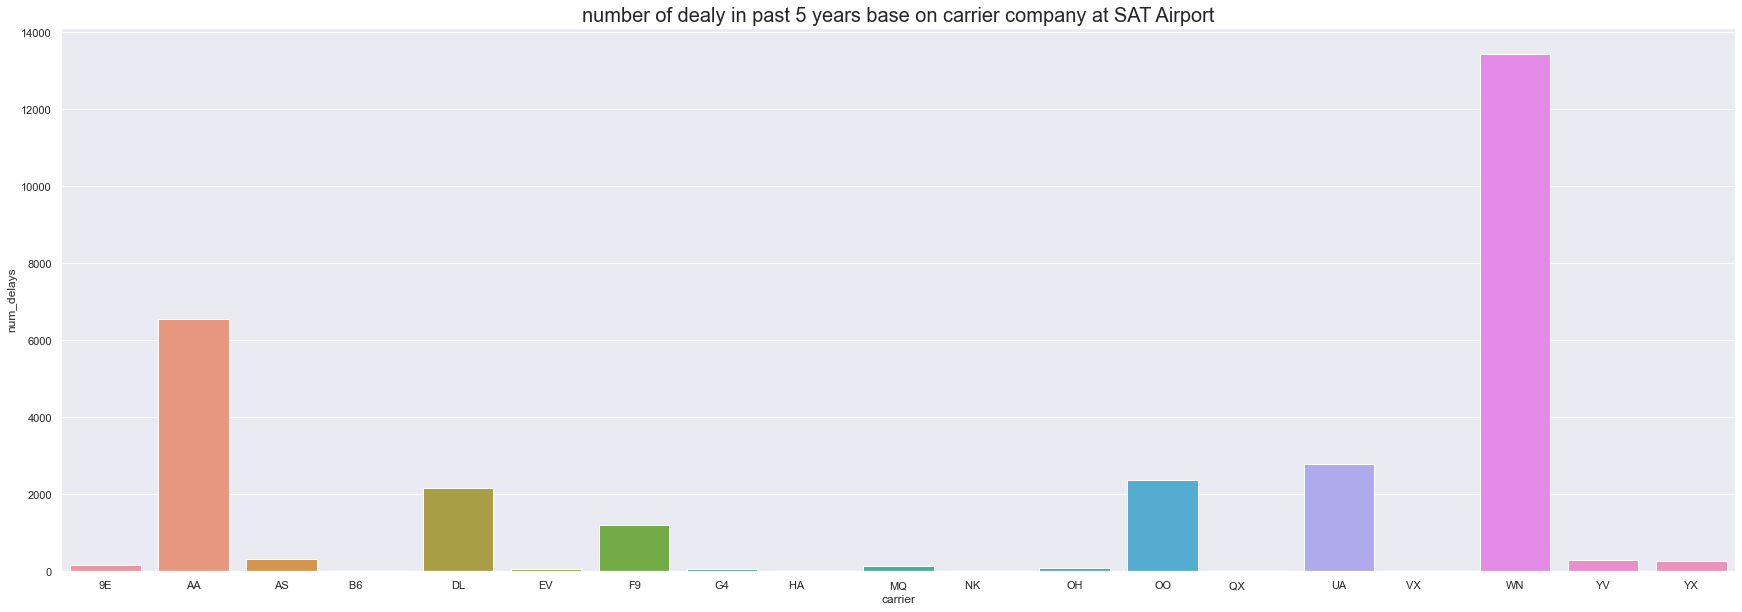

In [524]:
## number of delay base on carrier
carrier_SAT=carrier['SAT']
carrier_sat= pd.read_csv('carrier_sat5.csv')
fig_dims=(30,10)
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x="carrier",y="num_delays",ax=ax,data=carrier_sat)
plt.title("number of dealy in past 5 years base on carrier company at SAT Airport",fontsize=20)

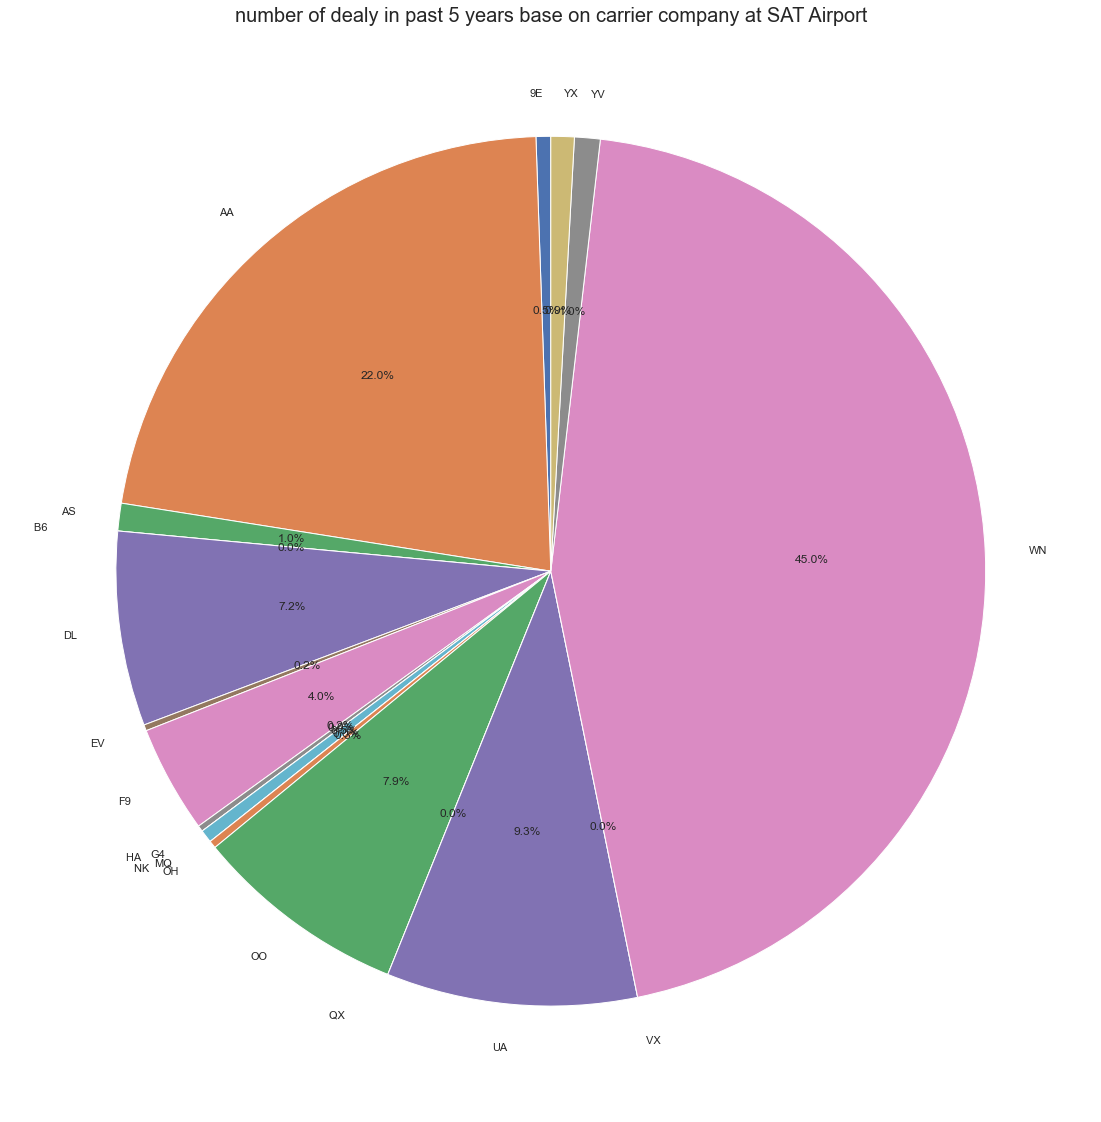

In [523]:
## pie plot for munber of delay in SAT in past 5years base on carrier
labels = carrier_sat.index
mylabels=carrier_sat['carrier']
plt.pie(carrier_sat['num_delays'], labels=mylabels,startangle=90, autopct='%.1f%%')
plt.title("number of dealy in past 5 years base on carrier company at SAT Airport",fontsize=20)
plt.show()

Text(0.5, 1.0, 'number of dealy in past 5 years base on carrier company')

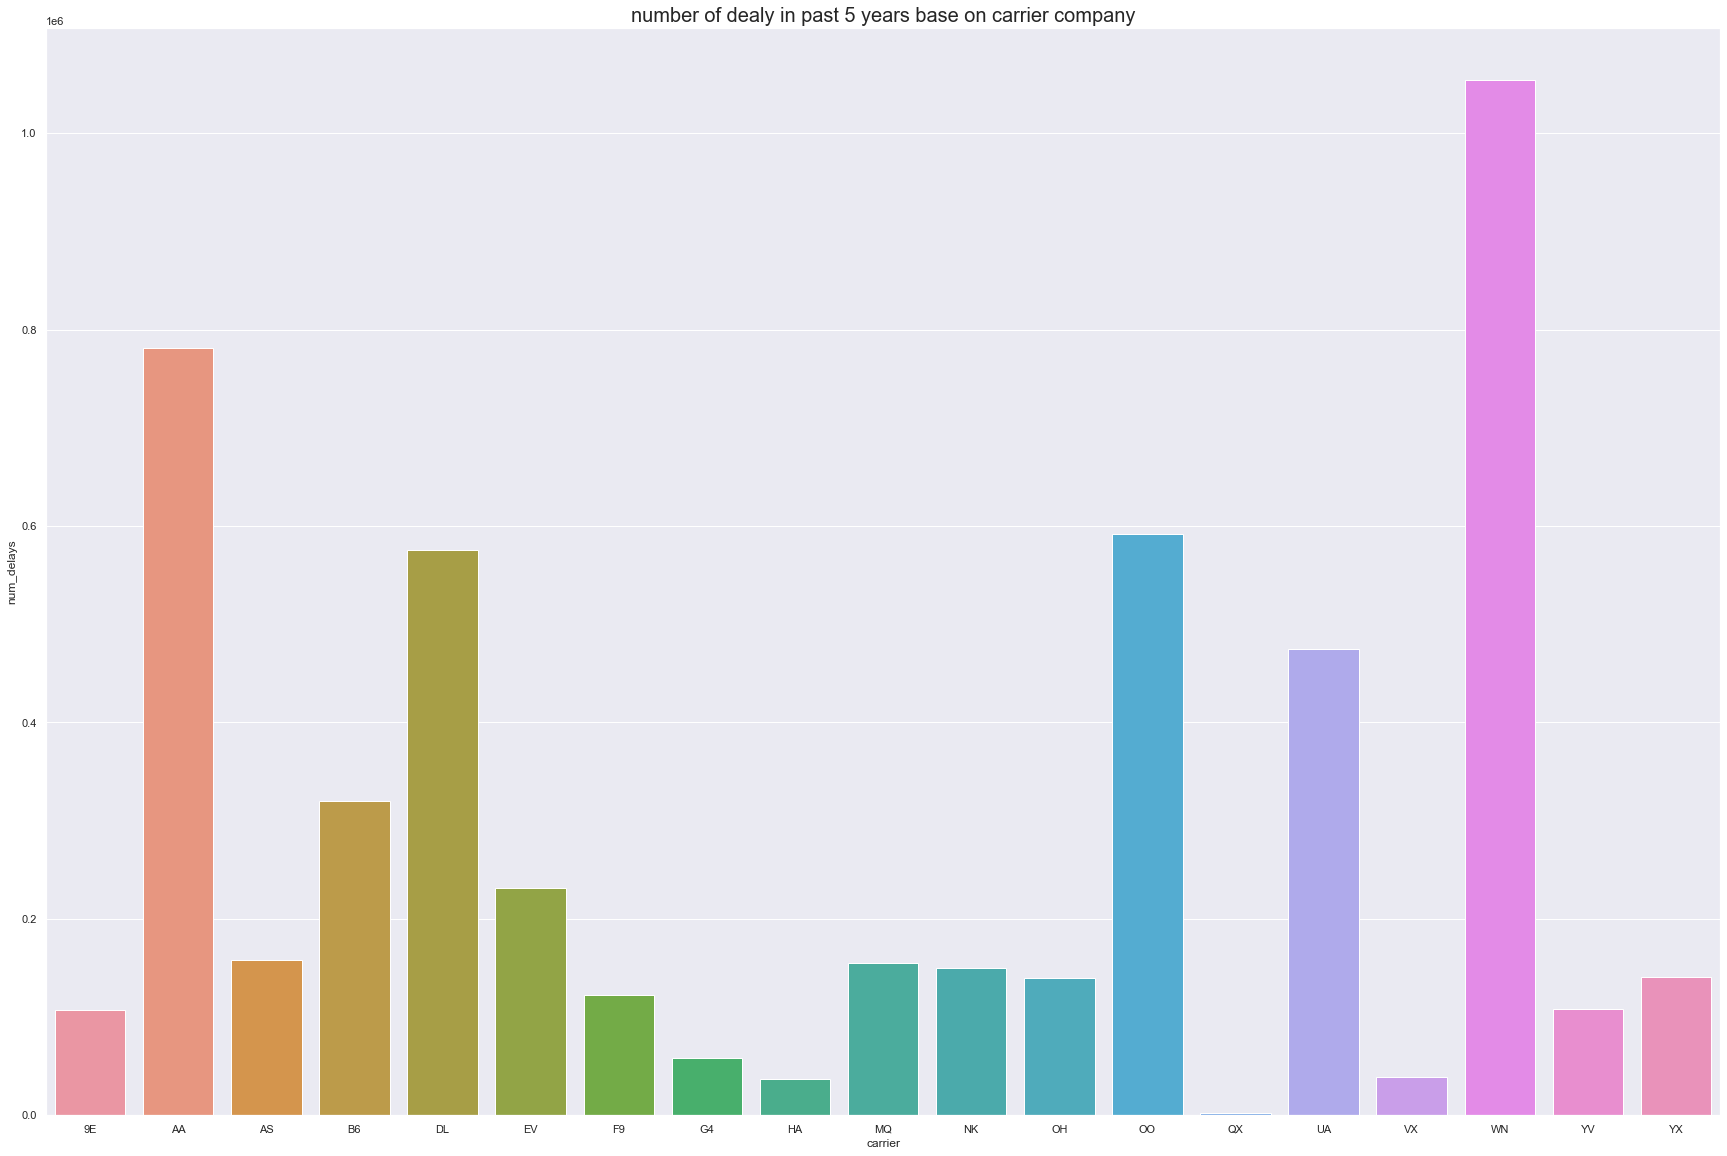

In [522]:
## carrier delay in usa
all_carrierdelay=data.groupby('carrier')['arr_del15'].sum().reset_index(name='num_delays')
fig_dims=(30,20)
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x="carrier",y="num_delays",ax=ax,data=all_carrierdelay)
plt.title("number of dealy in past 5 years base on carrier company",fontsize=20)

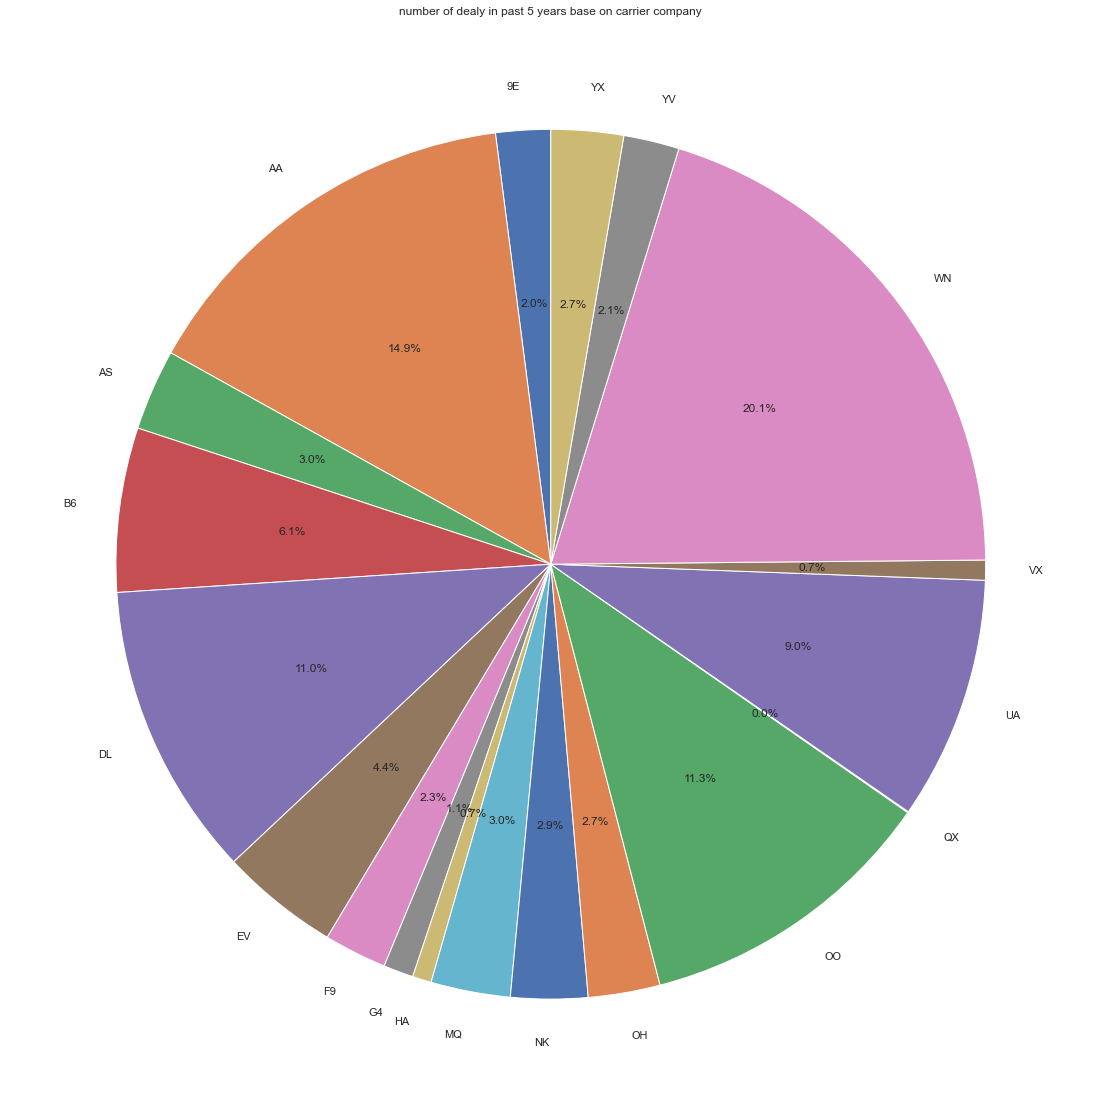

In [519]:
## pie plot for munber of delay in past 5years base on carrier
labels = all_carrierdelay.index
mylabels=all_carrierdelay['carrier']
plt.pie(all_carrierdelay['num_delays'], labels=mylabels,startangle=90, autopct='%.1f%%')
plt.title("number of dealy in past 5 years base on carrier company")
plt.show()

Text(0.5, 1.0, 'year VS number of delays')

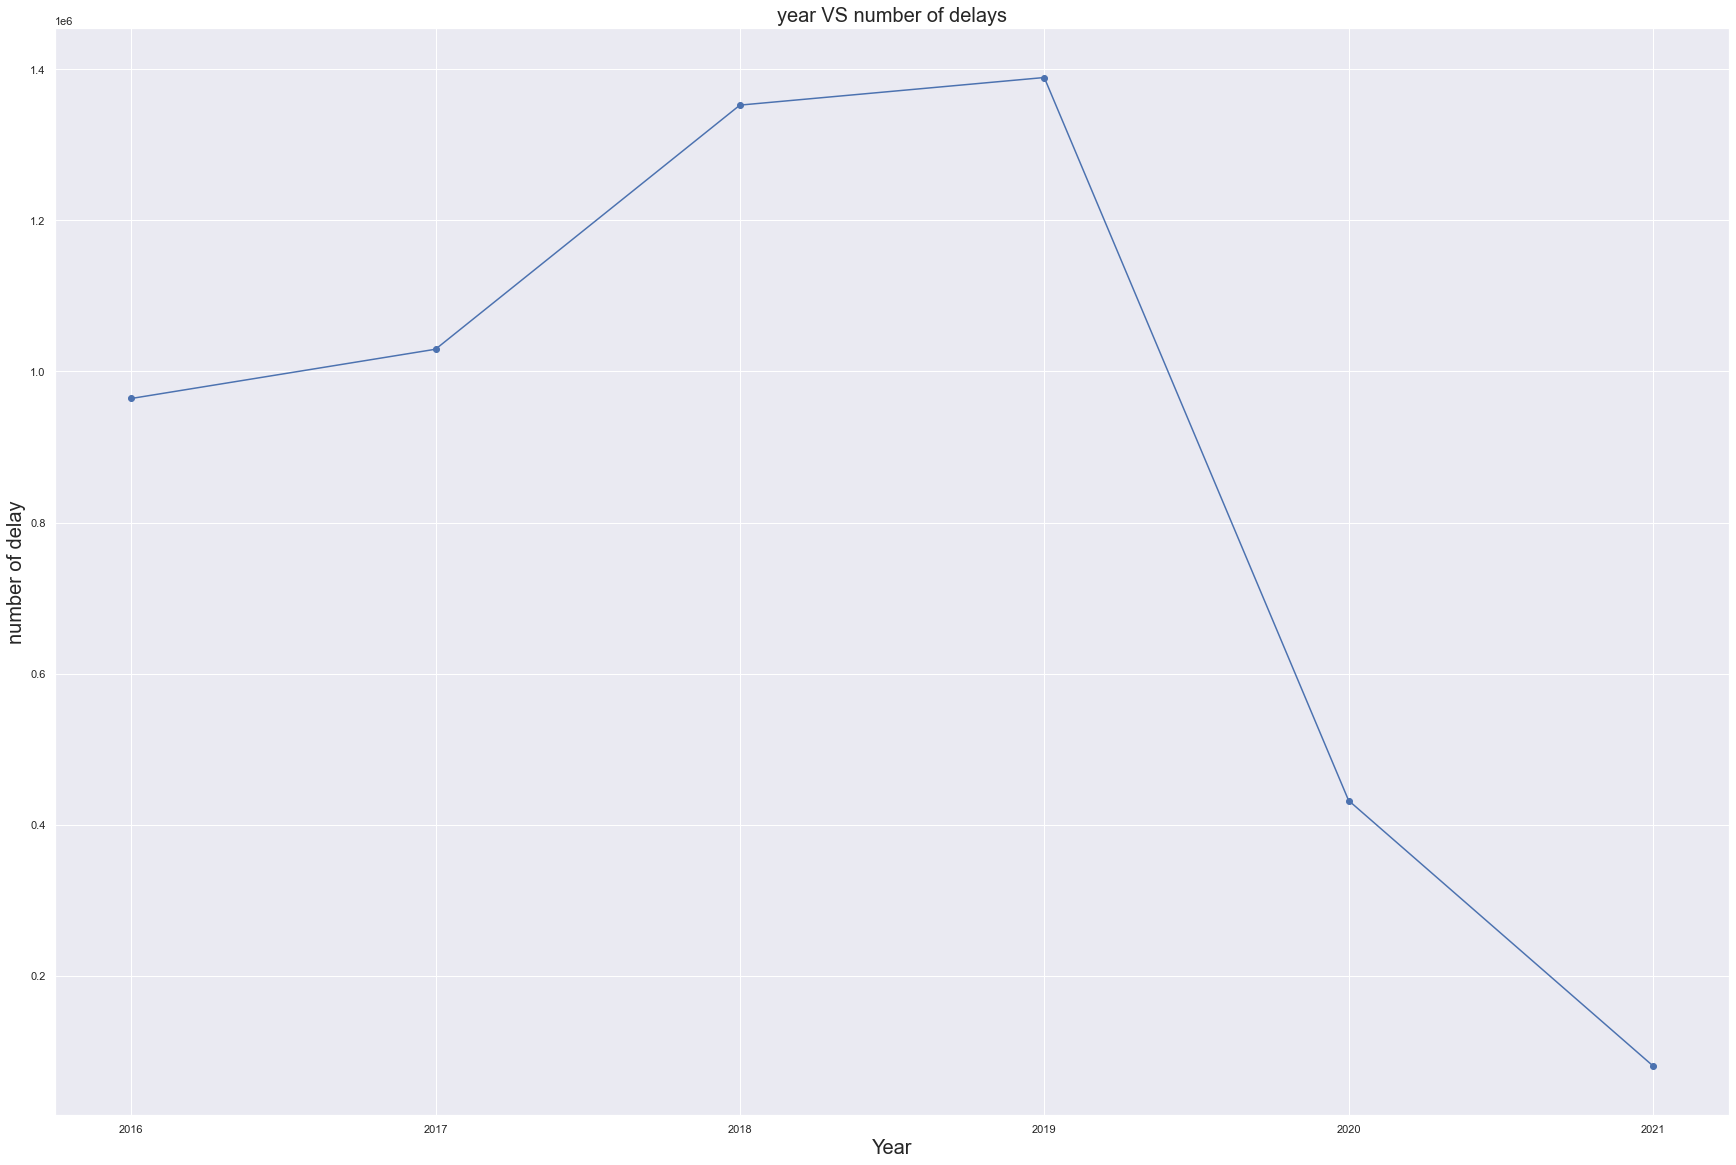

In [506]:
## delay change in years
delay_by_year=data.groupby('year')['arr_del15'].sum().reset_index(name='num_delays')
delay_by_year
plt.plot(delay_by_year['year'],delay_by_year['num_delays'],'o-')
plt.xlabel('Year',fontsize=20)
plt.ylabel('number of delay',fontsize=20)
plt.title('year VS number of delays',fontsize=20)

Text(0.5, 1.0, 'year VS number of delays')

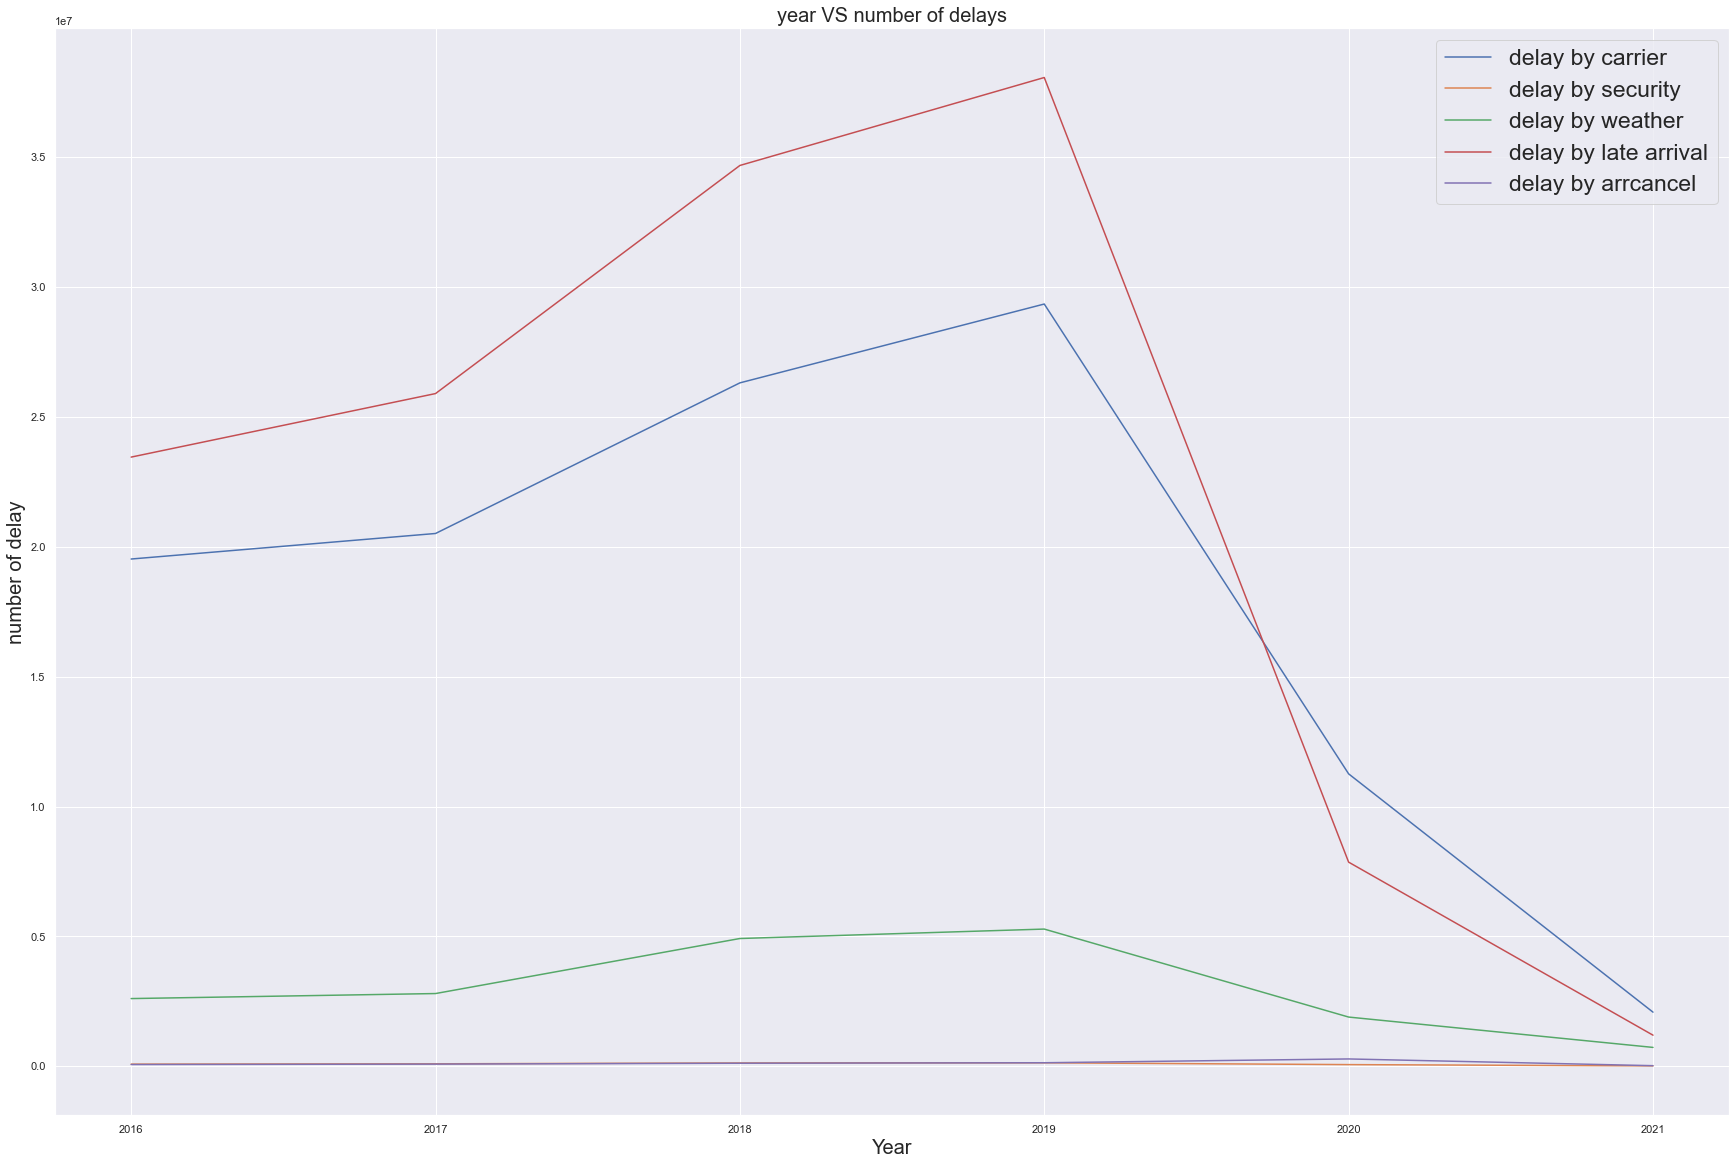

In [507]:
##parepare data for plot
#The data is for delay in different reason
delay_by_reason=data.groupby('year')[' carrier_delay'].sum().reset_index(name='carrier')
delay_by_security=data.groupby('year')['security_delay'].sum().reset_index(name='security')
delay_by_weather=data.groupby('year')['weather_delay'].sum().reset_index(name='weather')
delay_by_latearr=data.groupby('year')['late_aircraft_delay'].sum().reset_index(name='latearr')
delay_by_arrcancel=data.groupby('year')['arr_cancelled'].sum().reset_index(name='arr_cancel')

#plot the data
plt.plot(delay_by_reason['year'],delay_by_reason['carrier'])
plt.plot(delay_by_security['year'],delay_by_security['security'])
plt.plot(delay_by_weather['year'],delay_by_weather['weather'])
plt.plot(delay_by_latearr['year'],delay_by_latearr['latearr'])
plt.plot(delay_by_arrcancel['year'],delay_by_arrcancel['arr_cancel'])
plt.legend(["delay by carrier","delay by security","delay by weather","delay by late arrival","delay by arrcancel"],prop={'size':23})
plt.xlabel('Year',fontsize=20)
plt.ylabel('number of delay',fontsize=20)
plt.title('year VS number of delays',fontsize=20)



Text(0.5, 1.0, 'year VS number of delays')

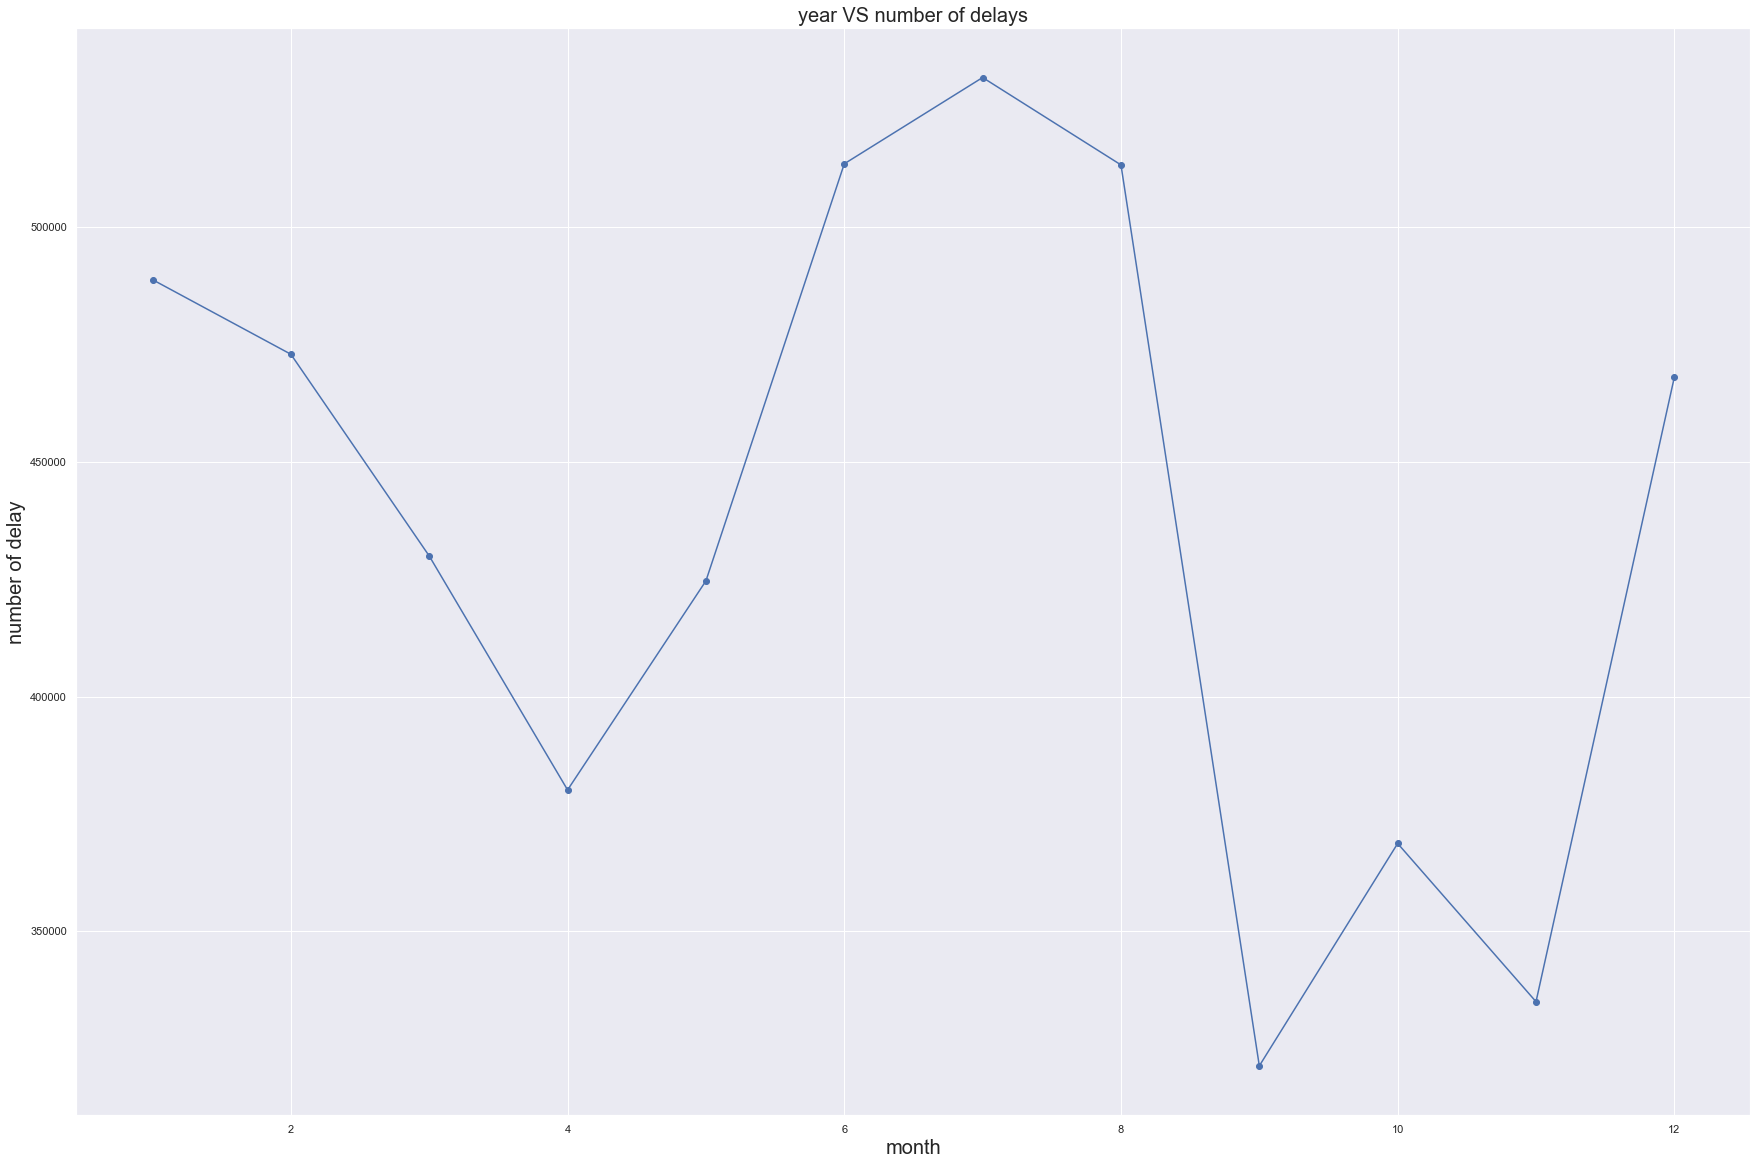

In [508]:
## delay by month
#pareparing data

delay_by_month=data.groupby(' month')['arr_del15'].sum().reset_index(name='num_delays')
plt.plot(delay_by_month[' month'],delay_by_month['num_delays'],'o-')
plt.xlabel('month',fontsize=20)
plt.ylabel('number of delay',fontsize=20)
plt.title('year VS number of delays',fontsize=20)

In [509]:
df_flights = data.groupby('carrier_name')['arr_flights'].sum().reset_index(name='num_arrived')
df_delay = data.groupby('carrier_name')['arr_del15'].sum().reset_index(name='num_delay')
df_delay = pd.merge(df_delay, df_flights, on='carrier_name')

# Calculate the percentage of flights cancelled.
df_delay['proportion'] = df_delay['num_delay'] / df_delay['num_arrived'] * 100

Text(0.5, 1.0, 'proportion of carrier company delay')

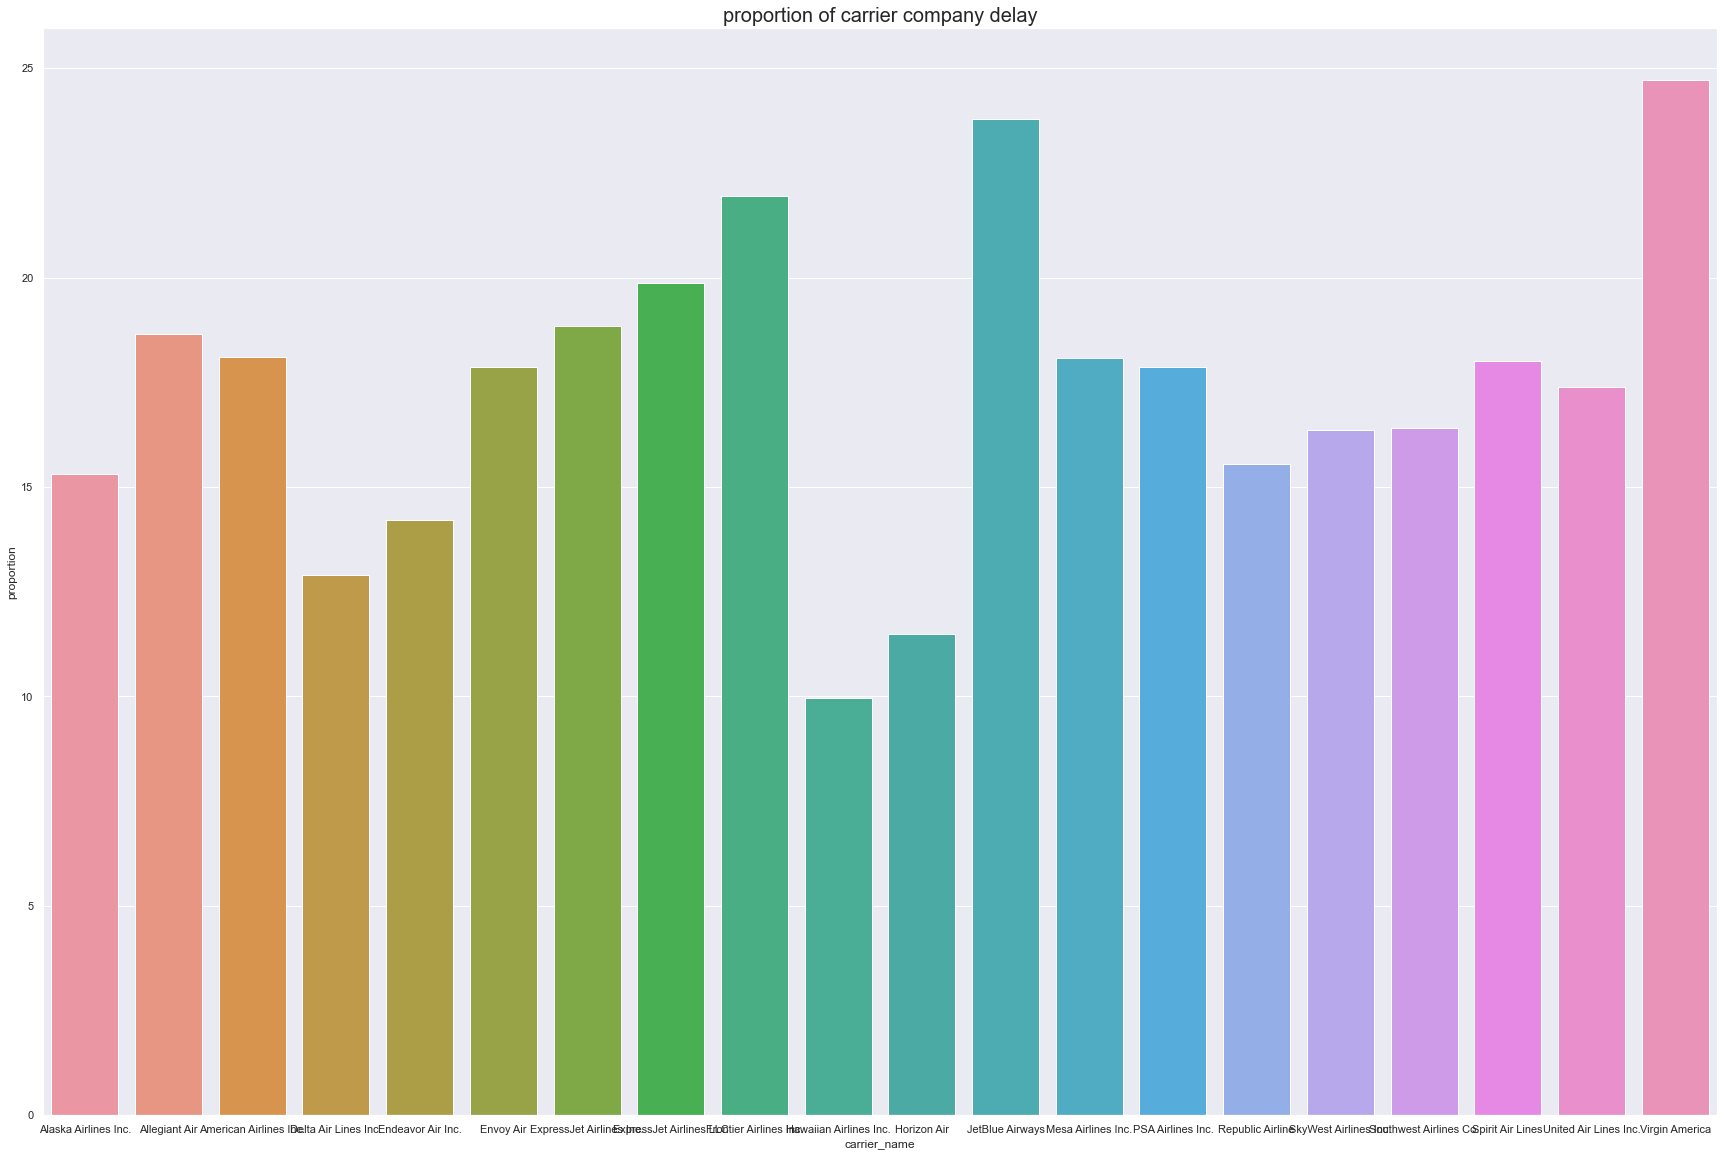

In [526]:
## histogram plot for 
sns.barplot(x="carrier_name",y="proportion",data=df_delay)
plt.title("proportion of carrier company delay",fontsize=20)

In [511]:
delay_by_reason=data.groupby(' month')[' carrier_delay'].sum().reset_index(name='carrier')
delay_by_security=data.groupby(' month')['security_delay'].sum().reset_index(name='security')
delay_by_weather=data.groupby(' month')['weather_delay'].sum().reset_index(name='weather')
delay_by_latearr=data.groupby(' month')['late_aircraft_delay'].sum().reset_index(name='latearr')
delay_by_arrcancel=data.groupby(' month')['arr_cancelled'].sum().reset_index(name='arr_cancel')
delay_by_nas=data.groupby(' month')['nas_delay'].sum().reset_index(name='nas')



In [512]:

result = pd.concat([delay_by_reason,delay_by_security,delay_by_weather,delay_by_latearr,delay_by_arrcancel,delay_by_nas],axis=1)
result=result[["carrier","security","weather","latearr","arr_cancel","nas"]]



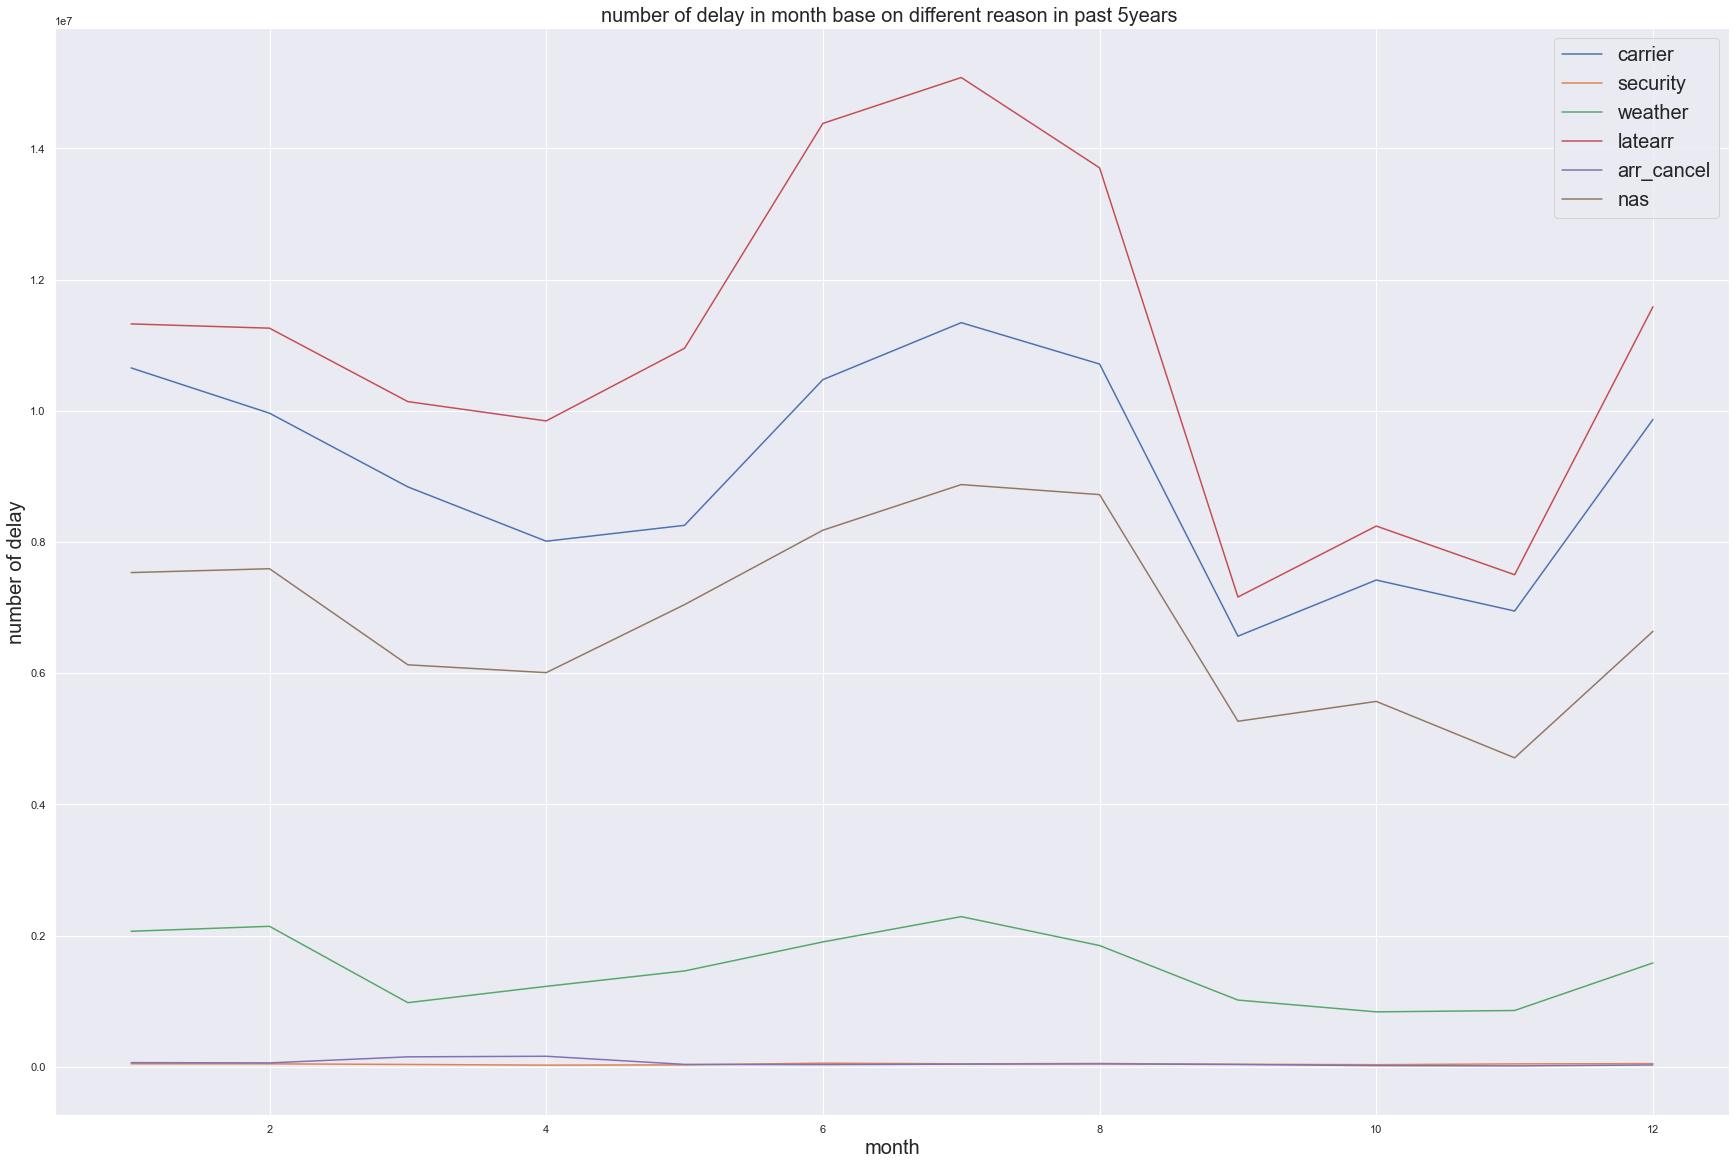

In [528]:
## for loop plot

x= range(1,13)
columns=result.columns
y=result.columns[0:]

for col in y:
    plt.plot(x,result[col])
    plt.xlabel('month',fontsize=20)
    plt.ylabel('number of delay',fontsize=20)
    plt.legend((y),fontsize=20)
    plt.title("number of delay in month base on different reason in past 5years ", fontsize=20)



In [514]:
## Linear regression
def calculate_linear_regression_coef(x,y):
    if(np.size(x)!=np.size(y)):
        sys.exit("The two vectors x and y are not of the same lenght.")


    #number of observations/points
    n=np.size(x)
    sx = np.sum(x)
    sy = np.sum(y)

    sx2 = np.inner(x,x)
    sxy = np.inner(x,y)
    sy2 = np.inner(y,y)

    # calculating regression coefficients 
    a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a0 = sy/n - a1*sx/n

    r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

    return(a0, a1, r2)

In [531]:
#plot between month and carrier

import numpy as np

x = x
y = result.carrier

#linear regression
a0, a1, r2 = calculate_linear_regression_coef(x, np.log(y))
y_pred = np.exp(a0) * np.exp(a1*x) 

print(a0,a1,r2)

16.130902099639837 -0.019041563837725074 0.1368657128539069


Text(1.0550000000000002, 10794526.145, 'y=10128888.02 * e^(-0.02*x)\nrsq=0.14')

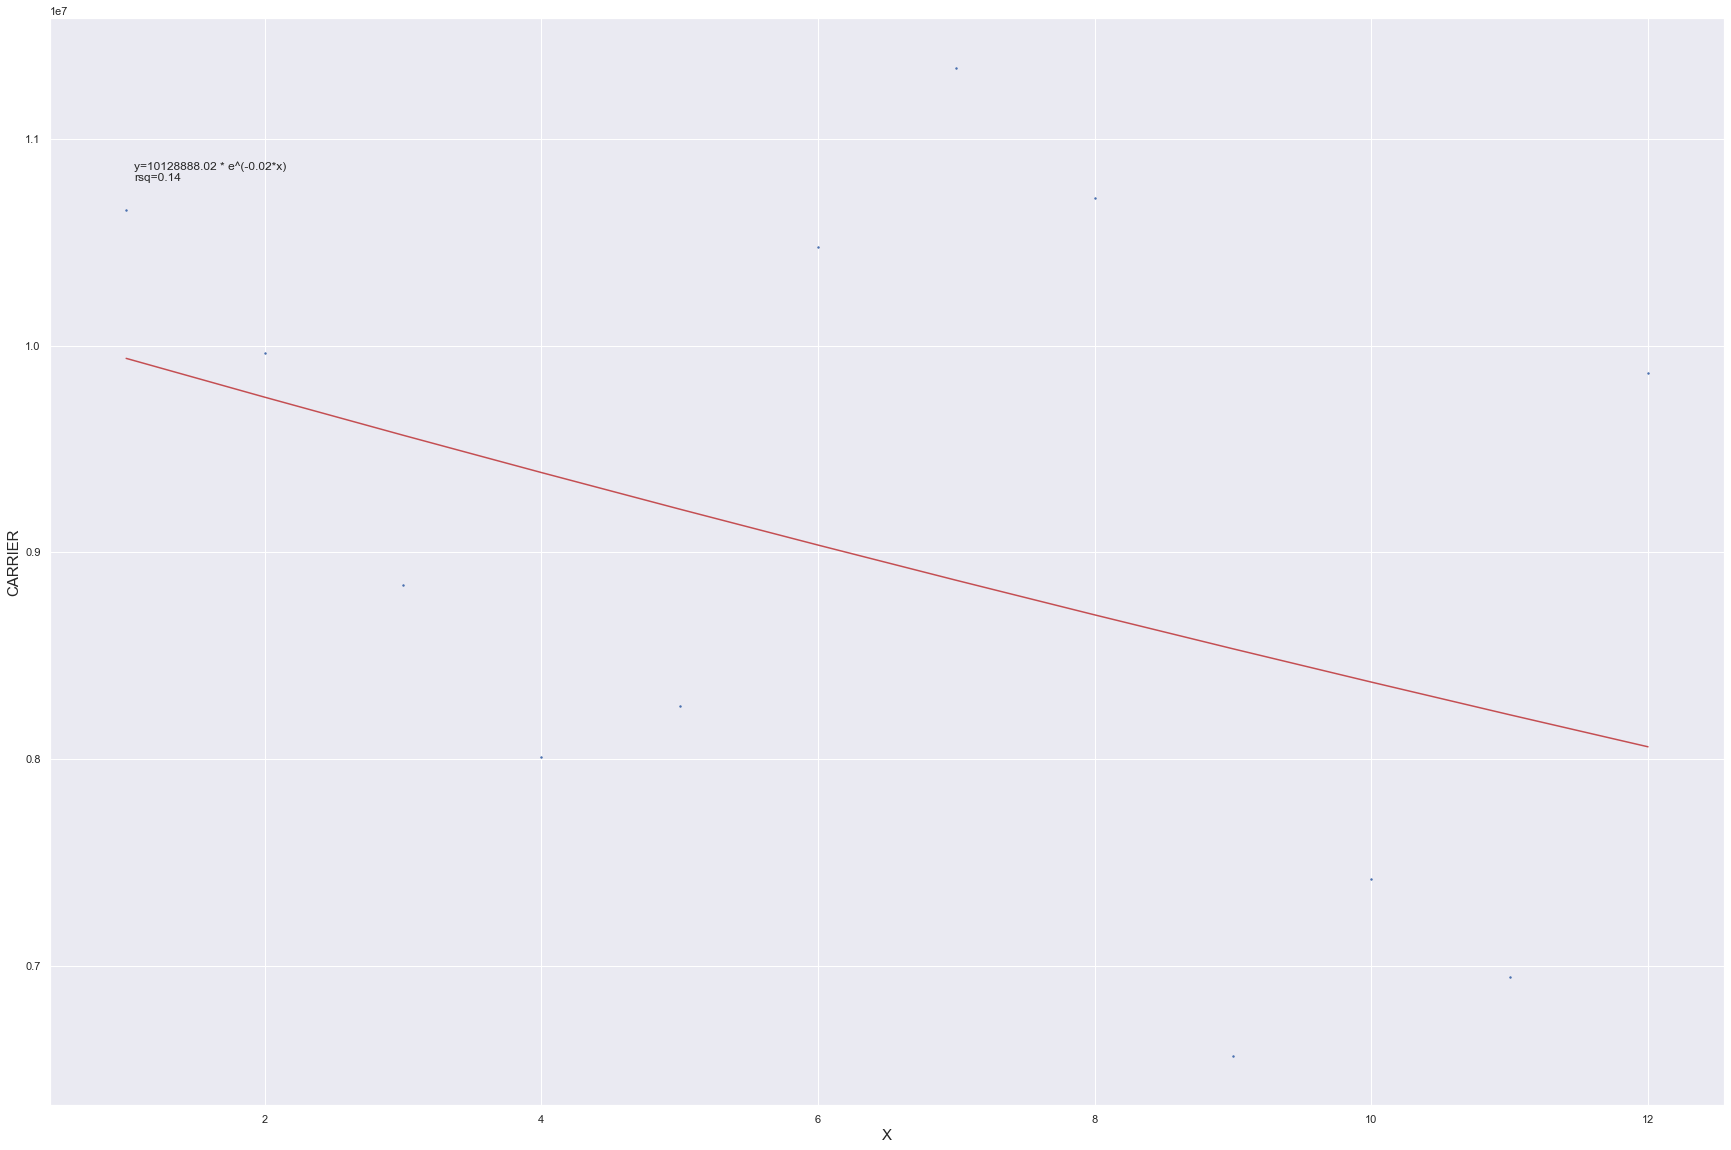

In [534]:
plt.scatter(x,y,s=2, color='b')
plt.plot(x,y_pred,color="r")
plt.xlabel(x1.upper(), fontsize = 15)            
plt.ylabel(y1.upper(), fontsize = 15) 
plt.grid(linewidth=1)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.text(xmin + (xmax-xmin)*0.05, ymax - (ymax-ymin)*0.15, "y=%.2f * e^(%.2f*x)\nrsq=%.2f"%(np.exp(a0), a1, r2) )


In [517]:
## correction plot
result[columns].corr()

,carrier,security,weather,latearr,arr_cancel,nas
carrier,1.000000,0.636227,0.905779,0.930269,-0.009102,0.928197
security,0.636227,1.000000,0.583451,0.563872,-0.488996,0.537891
weather,0.905779,0.583451,1.000000,0.845957,-0.132641,0.910473
latearr,0.930269,0.563872,0.845957,1.000000,-0.040225,0.955980
arr_cancel,-0.009102,-0.488996,-0.132641,-0.040225,1.000000,-0.082344
nas,0.928197,0.537891,0.910473,0.955980,-0.082344,1.000000


In [559]:
## Find the delay of all airplot in Jan 2016
dfl=data[(data[' month']==1)&(data['year']==2016)]
dfl
dfl=dfl.groupby('airport')['arr_del15'].sum().reset_index(name='num_delays')
df2016Jan = dfl[['airport', 'num_delays']].drop_duplicates().reset_index(drop=True)

# Merge the coordinates DataFrame with the airports DataFrame.
df2016Jan = pd.merge(df2016Jan, df_coords, on='airport')
df2016Jan
df2016Jan.to_csv('Jan2016')

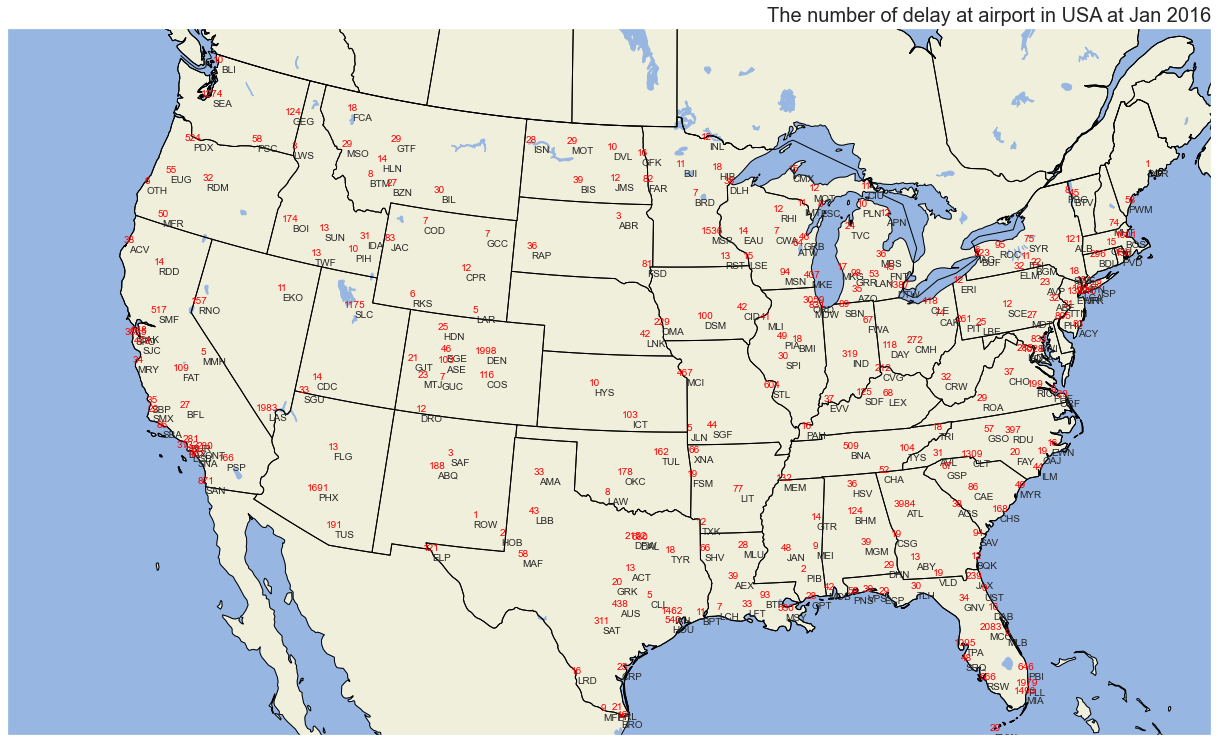

In [557]:
## plot airplot and number of delay in past 5 years
# set up the map projection
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[40])

# Use the Cartopy map projection to transform station locations to the map and
# then refine the number of stations plotted by setting a 300km radius
point_locs = proj.transform_points(ccrs.PlateCarree(), delay5['long'].values,
                                   delay5['lat'].values)
## Plot the airplots in station
# look of the text rendering.
plt.rcParams['savefig.dpi'] = 260

# Create the figure and an axes set to the projection.
fig = plt.figure(figsize=(24, 13))

ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add some various map elements to the plot to make it recognizable.
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Set plot bounds
ax.set_extent((-123, -73, 23, 50))

#
# Here's the actual station plot
from matplotlib.transforms import Bbox


# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax,df2016Jan['long'].values, df2016Jan['lat'].values,
                          clip_on=True,transform=ccrs.PlateCarree(), fontsize=10,)
stationplot.plot_text((1, -1),df2016Jan['airport'])
#plot number of delay
stationplot.plot_parameter('C', df2016Jan['num_delays'].values, color='red')
plt.title('The number of delay at airport in USA at Jan 2016', fontsize=20, loc='right')

plt.show()

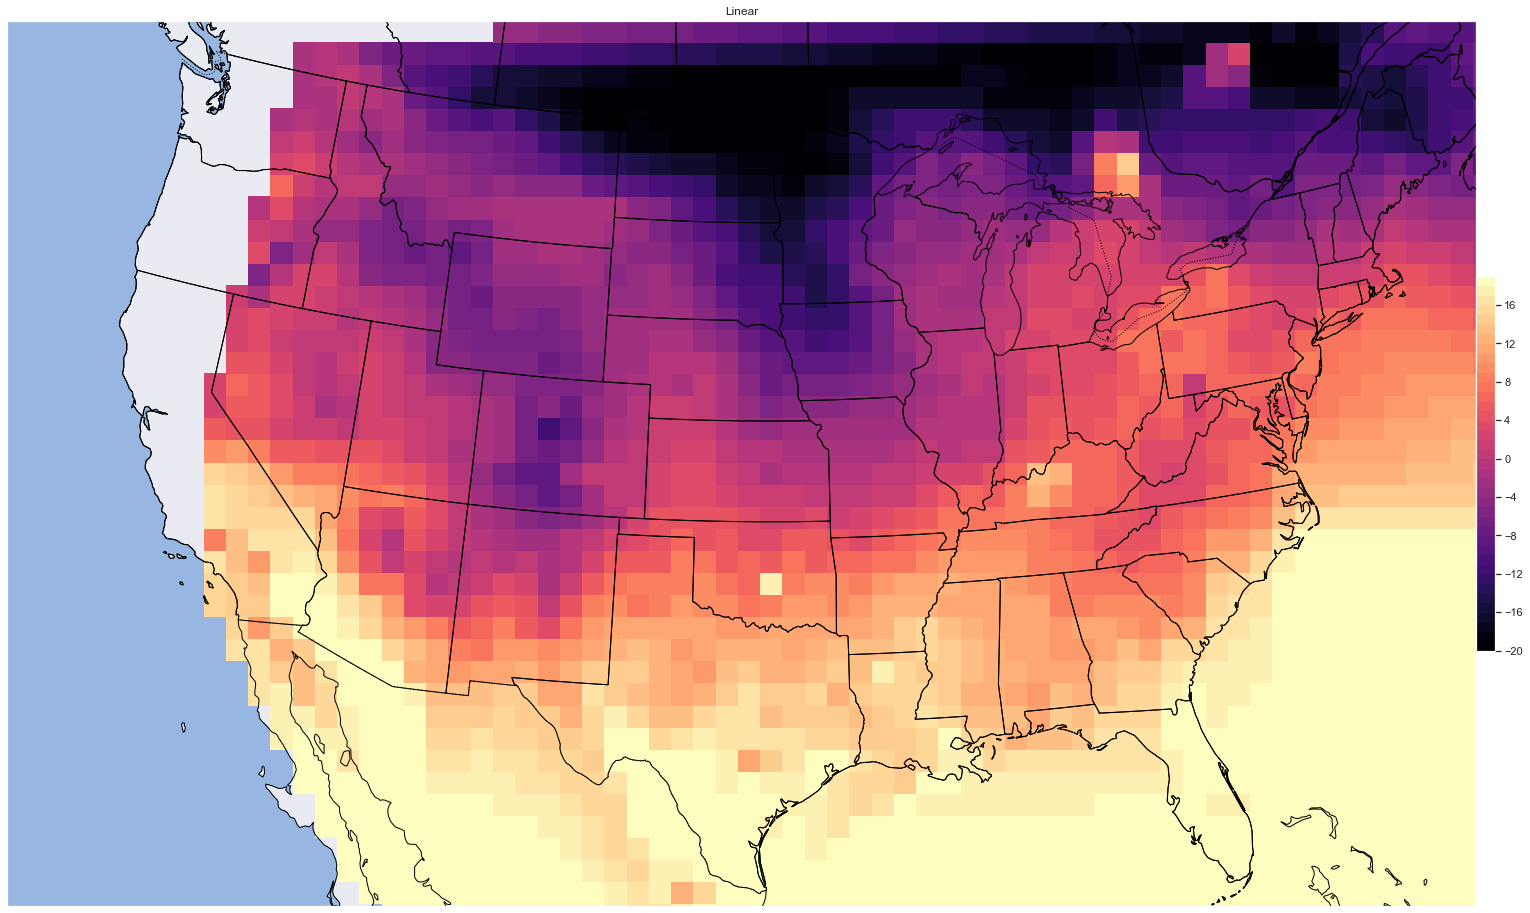

In [555]:
from matplotlib.colors import BoundaryNorm
def basic_map(proj, title):
    """Make our basic default map for plotting"""
    fig = plt.figure(figsize=(24, 13))
    
    view = fig.add_axes([0, 0, 1, 1], projection=proj)
    view.set_title(title)
    view.set_extent([-123, -73, 23, 50])
    view.add_feature(cfeature.STATES.with_scale('50m'))
    view.add_feature(cfeature.OCEAN)
    view.add_feature(cfeature.COASTLINE)
    view.add_feature(cfeature.BORDERS, linestyle=':')
    return fig, view


def station_test_data(variable_names, proj_from=None, proj_to=None):
    with get_test_data('station_data.txt') as f:
        all_data = np.loadtxt(f, skiprows=1, delimiter=',',
                              usecols=(1, 2, 3, 4, 5, 6, 7, 17, 18, 19),
                              dtype=np.dtype([('stid', '3S'), ('lat', 'f'), ('lon', 'f'),
                                              ('slp', 'f'), ('air_temperature', 'f'),
                                              ('cloud_fraction', 'f'), ('dewpoint', 'f'),
                                              ('weather', '16S'),
                                              ('wind_dir', 'f'), ('wind_speed', 'f')]))

    all_stids = [s.decode('ascii') for s in all_data['stid']]

    data = np.concatenate([all_data[all_stids.index(site)].reshape(1, ) for site in all_stids])

    value = data[variable_names]
    lon = data['lon']
    lat = data['lat']

    if proj_from is not None and proj_to is not None:

        try:

            proj_points = proj_to.transform_points(proj_from, lon, lat)
            return proj_points[:, 0], proj_points[:, 1], value

        except Exception as e:

            print(e)
            return None

    return lon, lat, value


from_proj = ccrs.Geodetic()
to_proj = ccrs.AlbersEqualArea(central_longitude=-97.0000, central_latitude=38.0000)

levels = list(range(-20, 20, 1))
cmap = plt.get_cmap('magma')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

x, y, temp = station_test_data('air_temperature', from_proj, to_proj)

x, y, temp = remove_nan_observations(x, y, temp)
x, y, temp = remove_repeat_coordinates(x, y, temp)
gx, gy, img = interpolate_to_grid(x, y, temp, interp_type='linear', hres=75000)
img = np.ma.masked_where(np.isnan(img), img)
fig, view = basic_map(to_proj, 'Linear')
mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
fig.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

